## Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
%matplotlib inline

## Путь к данным

In [2]:
DATA_PATH = os.path.join(os.getcwd(), 'Python', '4.1', 'names')
print(DATA_PATH)

C:\Users\Белоусовы\Python\4.1\names


## Список файлов

In [3]:
def get_files_by_ext(files, ext):
    result = {}
    for file_name in files:
        if file_name.endswith("." + ext):
            year = int(os.path.splitext(os.path.basename(file_name))[0][-4:])
            result[year] = os.path.join(DATA_PATH, file_name)
    return result
file_list = get_files_by_ext(os.listdir(DATA_PATH), "txt")
print(file_list[1880])
print(file_list[1881])
print(file_list[1882])
print(file_list[2017])

C:\Users\Белоусовы\Python\4.1\names\yob1880.txt
C:\Users\Белоусовы\Python\4.1\names\yob1881.txt
C:\Users\Белоусовы\Python\4.1\names\yob1882.txt
C:\Users\Белоусовы\Python\4.1\names\yob2017.txt


## Функции соединения фреймов

In [28]:
def get_df_merge(years):
    df = None
    for year in years:
        if df is None:
            df = pd.read_csv(file_list[year],
                             names=['Name', 'Gender', year],
                             engine="python")
        else:
            df2 = pd.read_csv(file_list[year],
                              names=['Name', 'Gender', year],
                              engine="python")
            df = pd.merge(df, df2, on=['Name', 'Gender'], how='outer')
    for year in years:
        df[year] = df[year].fillna(0).astype(np.int64)
    return df


def get_df_concat(years):
    dfs = []
    for year in years:
        dfs.append(pd.read_csv(file_list[year],
                               names=['Name', 'Gender', 'Count'],
                               engine="python"))
    return pd.concat(dfs, ignore_index=True).groupby('Name').sum()

## Динамика изменения имен

In [5]:
dynamics = get_df_merge([i for i in range(1900, 2001)])
dynamics = dynamics[dynamics['Name'].isin(['Ruth', 'Robert'])].groupby('Name').sum()
dynamics

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
Name,,,,,,,,,,,,,,,,,,,,,
Robert,3845,2559,3201,3057,3427,3431,3651,4042,4245,4588,...,26905,24147,22513,20607,18627,17711,16340,15552,14563,13760
Ruth,4781,3989,4401,4531,4915,5088,5159,5588,6200,6526,...,990,853,863,880,858,801,856,850,870,903


## График изменения имен

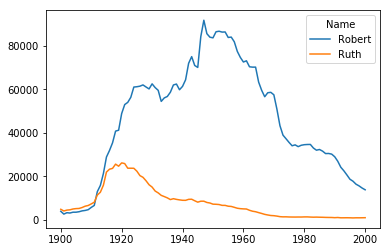

In [6]:
A = dynamics.T
plot = A.plot()

## Соединение фреймов за период 1900-2000 с шагом в 5 лет

In [7]:
count = get_df_merge([i for i in range(1900, 2001, 5)]).groupby('Name').sum()

## Гистограмма по количеству имен

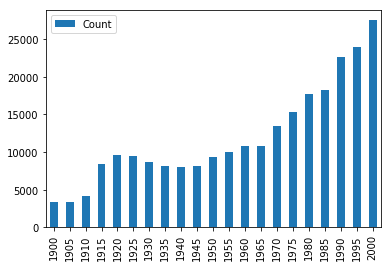

In [8]:
A = pd.DataFrame(count.astype(bool).sum(axis=0), columns=['Count'])
plot = A.plot.bar()

## ТОП 10 имен на R за 1950

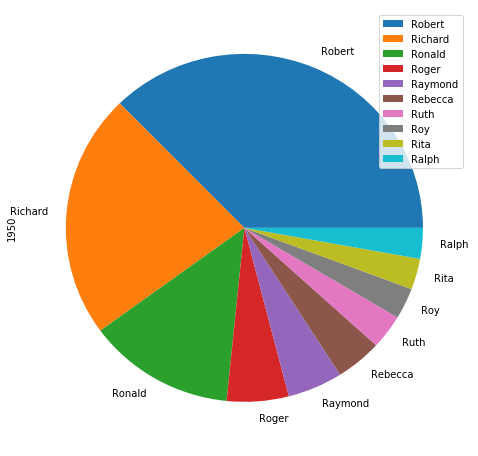

In [9]:
def get_top_n_name_by_template(n, year, template):
    names = get_df_merge([year]).set_index('Name').filter(regex=template, axis=0).groupby('Name').sum()
    names = names.sort_values(year, ascending=False).head(n)
    return names
names = get_top_n_name_by_template(10, 1950, '^R')
names.plot.pie(y=1950, figsize=(8, 8))

## Имена с согласными буквами

In [10]:
names = get_df_concat([i for i in range(1900, 2001)])
def struct_of_word(some_word):
    word = some_word.lower()
    vowels = 0
    consonants = 0
    for letter in word:
        if letter == "a" or letter == "e" or\
           letter == "i" or letter == "o" or\
           letter == "u":
            vowels += 1
        else:
            consonants += 1
    return {'vowels': vowels, 'consonants': consonants}
def get_consonants(row):
    return struct_of_word(row.name)['consonants']
names['Count_Consonant'] = names.apply(get_consonants, axis=1)
names.head(3)

,Count,Count_Consonant
Name,,
Aadam,58,2
Aadarsh,5,4
Aadil,80,2


## Частоты употребления согласных букв

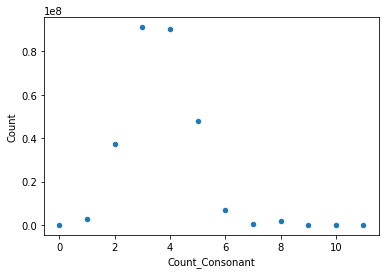

In [27]:
names_freq = names.groupby('Count_Consonant', as_index=False).sum()
names_freq.plot.scatter(x='Count_Consonant', y='Count')